#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados, datos_cliente

#**2. Preprocesamiento de Datos**


---


In [2]:
df_banco = pd.read_csv("german_credit.csv", sep=',')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [4]:
### Vamos a crear una función llamada procesar_datos()
def procesar_datos():
    global df_banco, resultados
    # Podemos observar que no tenemos ningun tipo de dato duplicado, sin embargo, vamos a tratarlo
    dates_duplicated = df_banco.duplicated().sum()
    if dates_duplicated > 0:
      df_banco.drop_duplicates(inplace=True)
    else:
      df_banco
    # Ver si hay nulos y de haberlos usaremos la media para llenar sustituir los valores nulos con la média
    media = df_banco.mean()
    nulos = df_banco.isnull().sum()
    if nulos.any():
      df_banco = df_banco.fillna(media)
    else:
      df_banco
    #Vamos a crear una lista con las columnas que queremos recorrer de nuestro dataframe, luego con un bucle for recorreremos cada columna, para obtener los valores unicos.
    columnas = ["account_check_status","credit_history","purpose","savings","present_emp_since","personal_status_sex","other_debtors","property","other_installment_plans","housing","job","telephone","foreign_worker"]
    for columna in columnas:
      valores_unicos = df_banco[columna].unique()
      print(f"Valores unicos en {columna}:{valores_unicos}")
    # Una vez hallado los valores unicos, vamos a crear diccionarios para transformar las variables de catégoricas a númericas, usando los valores unicos que nos arrojo .
    dict_account = { "< 0 DM":1,
                    "0 <= ... < 200 DM":2,
                    ">= 200 DM / salary assignments for at least 1 year":3,
                    "no checking account":4
                    }

    dict_credit_history =  { "no credits taken/ all credits paid back duly":1,
                            "all credits at this bank paid back duly":2,
                            "existing credits paid back duly till now":3,
                            "delay in paying off in the past":4,
                            "critical account/ other credits existing (not at this bank)":5
                            }

    dict_purpose =  { "car (new)":	1,
                      "car (used)":2,
                      "furniture/equipment":3,
                      "radio/television":4,
                      "domestic appliances":5,
                      "repairs":6,
                      "education":7,
                      "(vacation - does not exist?)":8,
                      "retraining":9,
                      "business":10,
                      "others":11,
                            }

    dic_savings={ "unknown/ no savings account":1,
                  ".. >= 1000 DM ":2,
                  "500 <= ... < 1000 DM ":3,
                  "100 <= ... < 500 DM":4,
                  "... < 100 DM":5
                    }
    dic_present_emp = { ".. >= 7 years":1,
                        "4 <= ... < 7 years":2,
                        "1 <= ... < 4 years":3,
                        "... < 1 year ":4,
                        "unemployed":5
                      }

    dic_personal_status_sex = { "male : divorced/separated":1,
                                "female : divorced/separated/married":2,
                                "male : single":3,
                                "male : married/widowed":4,
                                "female : single":5
                              }

    dict_other_debtors = { "none":1,
                          "co-applicant":2,
                          "guarantor":3
                          }

    dict_property = {"real estate":1,
                    "if not A121 : building society savings agreement/ life insurance":2,
                    "if not A121/A122 : car or other, not in attribute 6":3,
                    "unknown / no property":4
                    }

    dict_other_installment_plans= {"bank":1,
                                  "stores":2,
                                  "none":3
                                  }

    dict_housing = {"rent":1,
                    "own":2,
                    "for free":3
                    }

    dict_job = {"unemployed/ unskilled - non-resident":1,
                "unskilled - resident":2,
                "skilled employee / official":3,
                "management/ self-employed/ highly qualified employee/ officer":4
                  }

    dict_telephone = {"none":1,
                      "yes, registered under the customers name ":2
                      }

    dict_foreign_worker = {"yes":1,
                          "no":2
                          }
    # vamos a crear un diccionario con los diccionarios ya creados. Este
    # se encargara de almacenar cada uno de los diccionarios creados, con
    # el fin de luego pasarlo a través de un bucle for para cada columna y
    # sustituyendo el contido de c/u con el contenido de los diccionarios
    # según el nombre de columna almacenado en este diccionario.
    diccionario = {"account_check_status":dict_account,
                  "credit_history":dict_credit_history,
                  "purpose":dict_purpose,
                  "savings":dic_savings,
                  "present_emp_since":dic_present_emp,
                  "personal_status_sex":dic_personal_status_sex,
                  "other_debtors":dict_other_debtors,
                  "property":dict_property,
                  "other_installment_plans":dict_other_installment_plans,
                  "housing":dict_housing,
                  "job":dict_job,
                  "telephone":dict_telephone,
                  "foreign_worker":dict_foreign_worker
                    }
    for columna in diccionario.keys():
        df_banco[columna] = df_banco[columna].map(diccionario[columna])
    return df_banco

In [5]:
procesar_datos()
df_banco.head()

Valores unicos en account_check_status:['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']
Valores unicos en credit_history:['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']
Valores unicos en purpose:['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']
Valores unicos en savings:['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']
Valores unicos en present_emp_since:['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']
Valores unicos en personal_status_sex:['male : single' 'female : divorced/separated/married'
 'male : divorced/separated' 'male :

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,2,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,1,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,1,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,1,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,1,1


In [6]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

#**3. Exploración de Datos**


---


In [7]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

,personal_status_sex,age,duration_in_month,credit_amount,default
0,3,67,6,1169,0
1,2,22,48,5951,1
2,3,49,12,2096,0
3,3,45,42,7882,0
4,3,53,24,4870,1


In [8]:
#Tu función feature_engineering() y tu código aqui
def feature_engineering():

  global df_banco, resultados

  # Ahora estamos creando los diccionarios, para realizar los cambios de los valores númericos de la columna
  # personal_Status_sex que guardaremos en un nueva variable(columna) llamada sexo, donde guardaremos si es
  # masculino o femenino como variables categorícas  donde 0 representa masculino y 1 femenino.

  dict_sex = {1:0,
            3:0,
            4:0,
            2:1,
            5:1}

  # Crearemos la variable estado_civil(columna nueva) donde guardaremos toda la información de el estado en que se
  # los registros de nuestras personas si son solteros o están en otras condiciones.

  dict_estado_civil = {"solteros":1,
                       "todos los demás casos":2}

  df_banco["sexo"]=df_banco["personal_status_sex"]
  df_banco["sexo"] = df_banco["sexo"].map(dict_sex)

  dict_estado_civil = { 1:0,
	                    2:0,
	                    3:1,
                      4:0,
                      5:1
                      }

  df_banco["estado_civil"] = df_banco["personal_status_sex"]
  df_banco["estado_civil"] = df_banco["estado_civil"].map(dict_estado_civil)

  intervalos_edad = [18,30,40,50,60,70,80]
  etiquetas_edad = [1,2,3,4,5,6]
  df_banco["rango_edad"] = pd.cut(x = df_banco["age"],bins=intervalos_edad,labels=etiquetas_edad)

  intervalos_duration = [1,12,24,36,48,60,72]
  etiquetas_duration = [1,2,3,4,5,6]
  df_banco["rango_plazos_credito"] = pd.cut(x = df_banco["duration_in_month"],bins=intervalos_duration,labels=etiquetas_duration)

  # Ahora vamos a llevar los valores de credit_amount en intervalos, para clasificar esto de una mejor manera
  # Aunque podemos realizar esto usando el método sturges, ya el cliente nos da la indicación de como dividir los valores, los dividiremos en 20 intervalos distintos
  intervalos_credito = [1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]
  etiquetas_credito = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
  df_banco["rango_valor_credito"] = pd.cut(x = df_banco["credit_amount"],bins=intervalos_credito,labels=etiquetas_credito)

  #Borrando las columnas con las que creamos las nuevas con el método .drop
  columnas=["credit_amount","duration_in_month","age","personal_status_sex"]
  df_banco = df_banco.drop(columnas,axis=1)

  # Como el método pd.cut realiza el cambio y guardas estas etiquetas en formato texto, usaremos el método pd.to_numeric para convertir esas etiquetas, en númerico
  # para nuestro caso de estudio, ya que aunque están en formatos textos, son números y necesitaremos la información para realizar un mapa de calor.
  df_banco["rango_edad"] = pd.to_numeric(df_banco["rango_edad"])
  df_banco["rango_plazos_credito"] = pd.to_numeric(df_banco["rango_plazos_credito"])
  df_banco["rango_valor_credito"] = pd.to_numeric(df_banco["rango_valor_credito"])

  return df_banco


In [9]:
feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,2,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,1,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,1,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,1,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,1,1,0,1,4,2,5


In [10]:
# #Tu función analisis_exploratorio() y tu código aqui
def analisis_exploratorio():

  fig, axs = plt.subplots(3, 2, figsize=(24, 18)) # Ajusta el número de subplots y el tamaño de la figura según tus necesidades

  sns.countplot(x="sexo", data=df_banco, ax=axs[0, 0],palette="tab10")
  axs[0, 0].set_xlabel("Sexo", fontsize=18)
  axs[0, 0].set_ylabel("Total", fontsize=18)
  axs[0,0].set_xticklabels(["Hombre","Mujer"])

  sns.countplot(x="estado_civil", data=df_banco, ax=axs[0, 1],palette="tab10")
  axs[0, 1].set_xlabel("Estado Civil", fontsize=18)
  axs[0, 1].set_ylabel("Total", fontsize=18)
  axs[0,1].set_xticklabels(["Otros casos","Solteros"])

  sns.countplot(x="rango_edad", data=df_banco, ax=axs[1, 0],palette="tab10")
  axs[1, 0].set_xlabel("Rango Edad", fontsize=18)
  axs[1, 0].set_ylabel("Total", fontsize=18)

  sns.countplot(x="rango_plazos_credito", data=df_banco, ax=axs[1, 1],palette="tab10")
  axs[1, 1].set_xlabel("Rango de los plazos de credito", fontsize=18)
  axs[1, 1].set_ylabel("Total", fontsize=18)

  sns.countplot(x="default", data=df_banco, ax=axs[2, 0],palette="tab10")
  axs[2, 0].set_xlabel("Default", fontsize=18)
  axs[2,0].set_ylabel("Total", fontsize=18)
  axs[2,0].set_xticklabels(["Buen pagador","Mal pagador"])

  # Eliminamos el último subplot vacío
  fig.delaxes(axs[2,1])

  plt.tight_layout()
  plt.show()

In [11]:
# df_banco.hist(bins=30, figsize=(20, 20), color='g' )

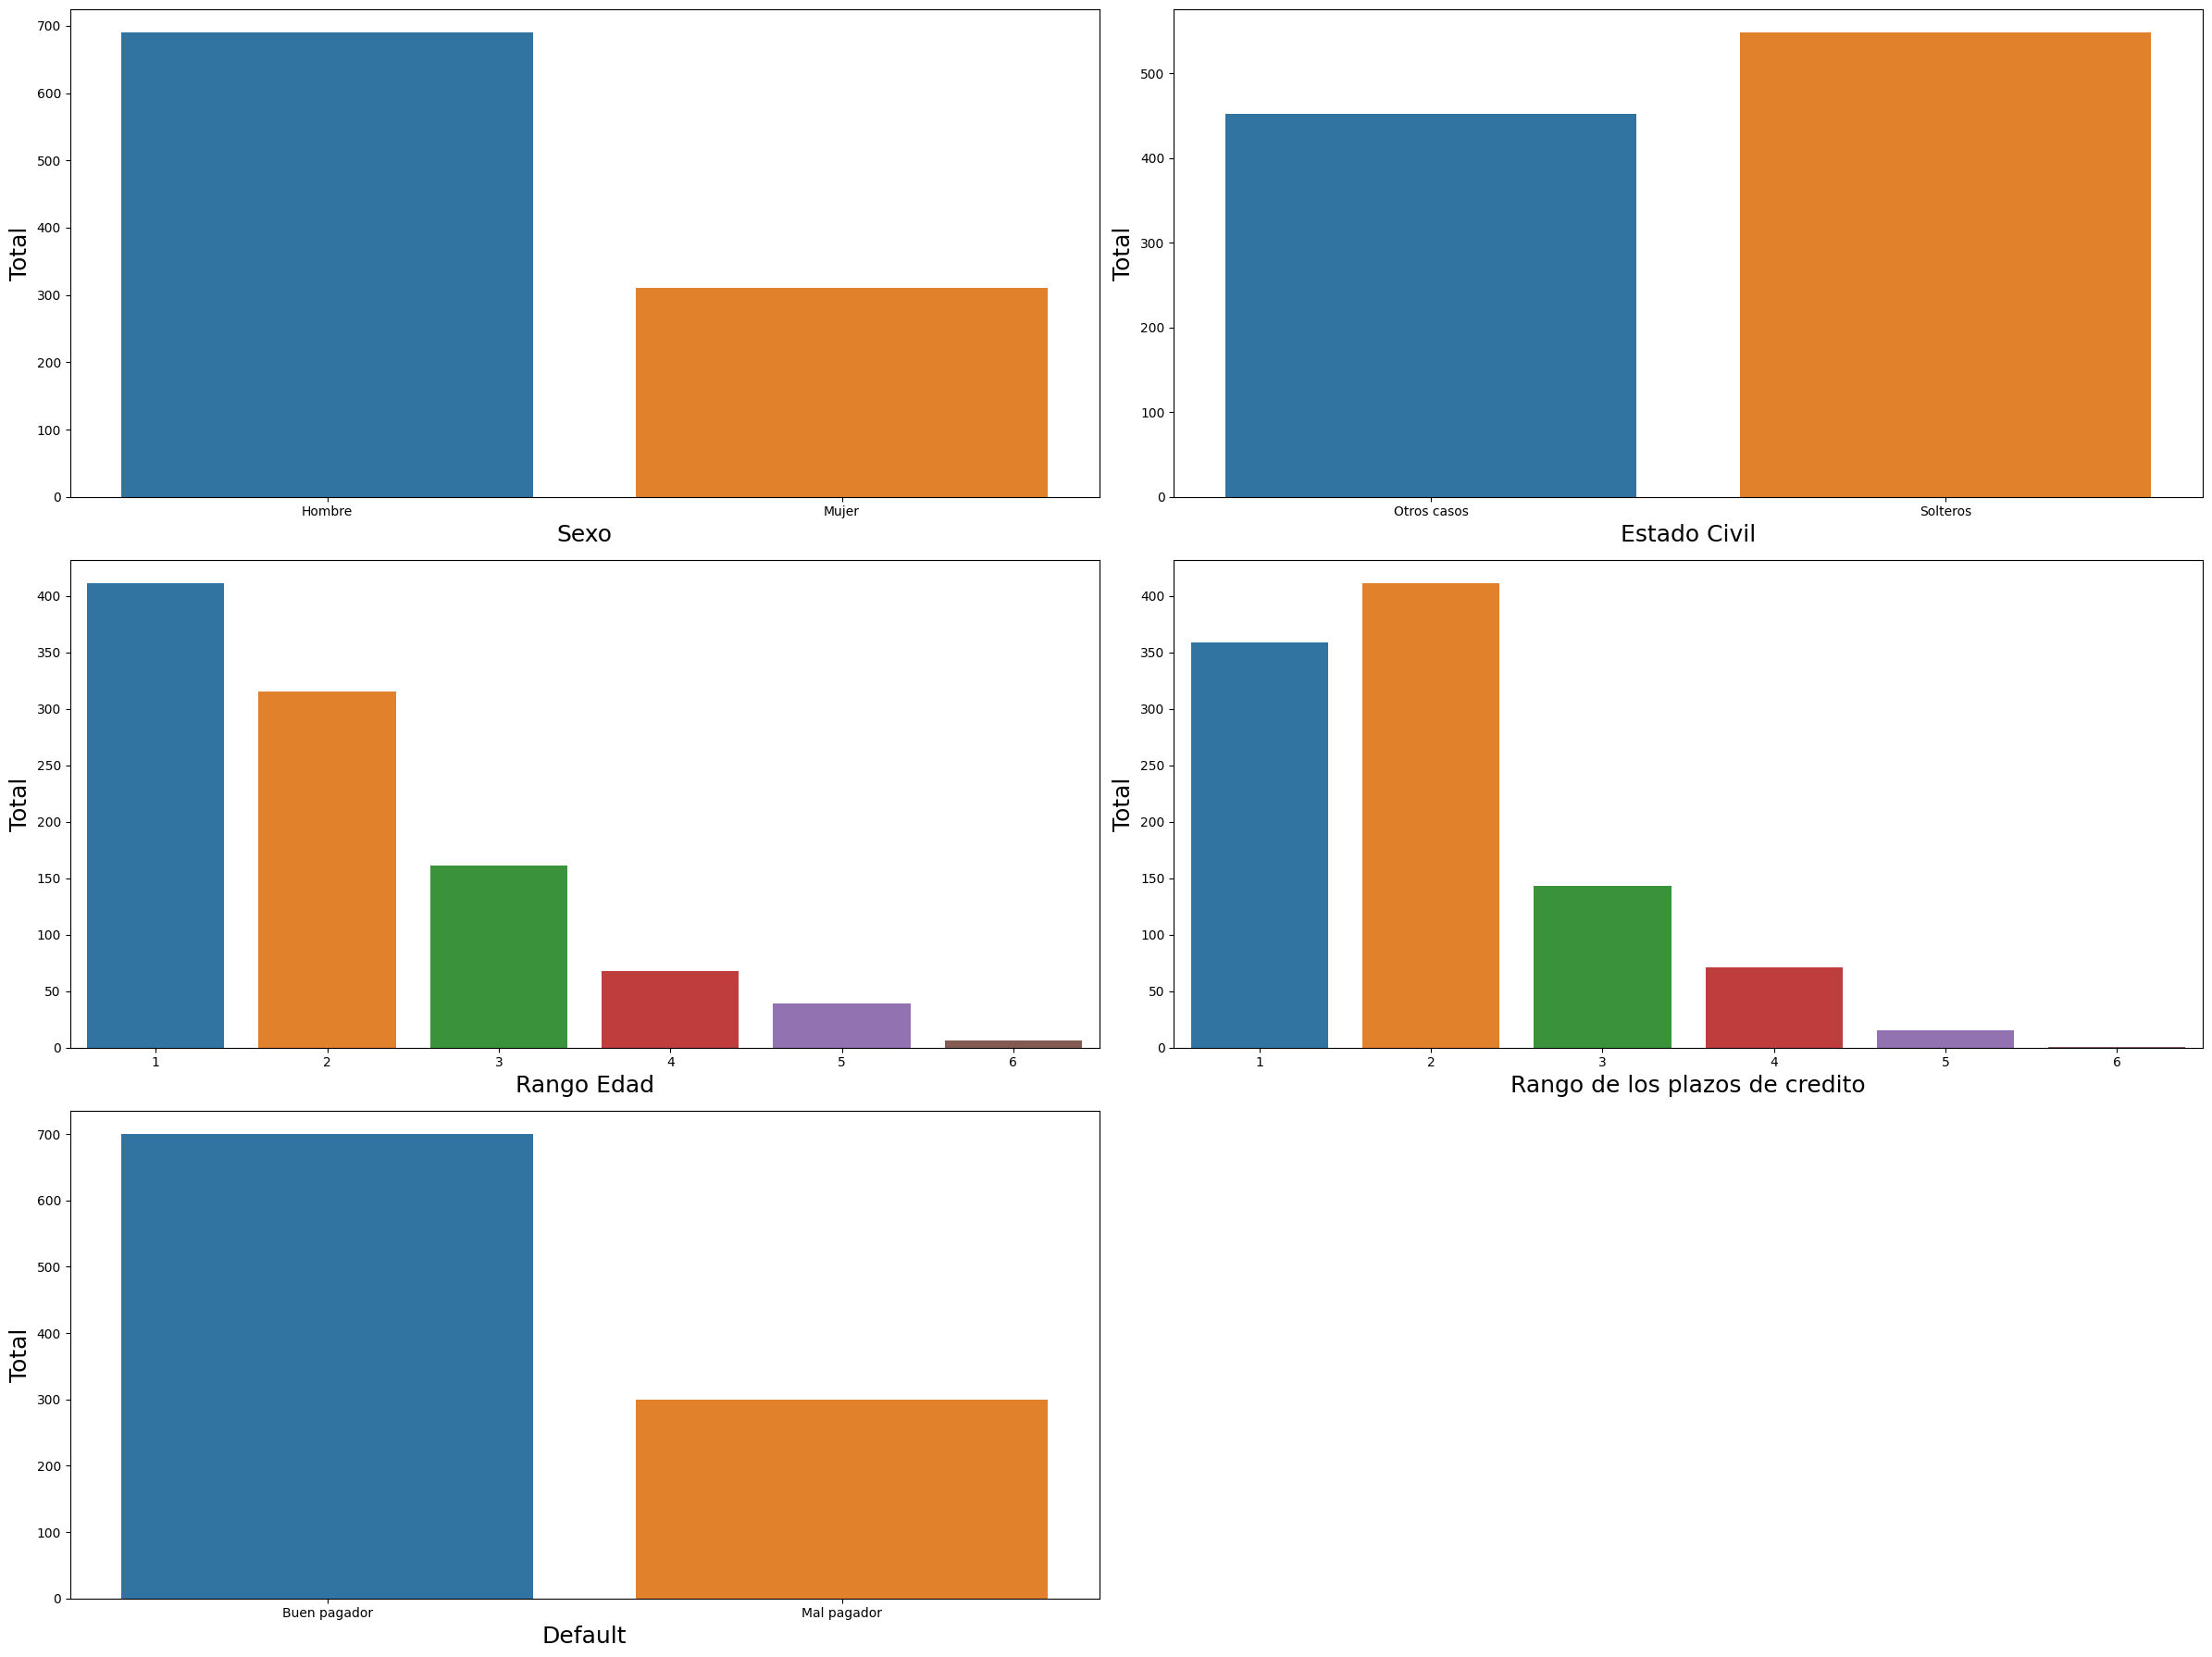

In [12]:
analisis_exploratorio()

**Análisis de los gráficos**

Para el análisis de las variables, vamos a hallar ciertos valores que nos puedan ayudar a interpretar mejor cada gráfico


In [13]:
# Cantidad de registros de la base de datos
cantidad_registros = len(df_banco)

# Análisis para gráfico de sexo

cantidad_sexo= df_banco["sexo"].value_counts() # con value_counts() realizamos el conteo de la cantidad de valores unicos en el dataframe
porcentaje_hombre = (cantidad_sexo[0]/cantidad_registros * 100).round(2)
porcentaje_mujer = (cantidad_sexo[1]/cantidad_registros * 100).round(2)
print(f"Porcentaje de mujeres del registro {porcentaje_mujer}% \nPorcentaje de hombres del registro  {porcentaje_hombre}%")
print("----------------------------------------------------------")

# Análsis para gráfico de estado_civil

cantidad_estado_civil= df_banco["estado_civil"].value_counts()
porcentaje_solteros = (cantidad_estado_civil[1]/cantidad_registros * 100).round(2)
porcentaje_otros_casos = (cantidad_estado_civil[0]/cantidad_registros * 100).round(2)
print(f"Porecentaje solteros {porcentaje_solteros}% de los registros de nuestra base de datos\nporcentaje otros casos {porcentaje_otros_casos}% de los registros.")
print("----------------------------------------------------------")

# Análsis para gráfico de rango_Edad

cantidad_rango_edad= df_banco["rango_edad"].value_counts()
porcentaje_18_30 = (cantidad_rango_edad[1]/cantidad_registros * 100).round(2)
porcentaje_30_40 = (cantidad_rango_edad[2]/cantidad_registros * 100).round(2)
porcentaje_40_50 = (cantidad_rango_edad[3]/cantidad_registros * 100).round(2)
porcentaje_50_60 = (cantidad_rango_edad[4]/cantidad_registros * 100).round(2)
porcentaje_60_70 = (cantidad_rango_edad[5]/cantidad_registros * 100).round(2)
porcentaje_70_80 = (cantidad_rango_edad[6]/cantidad_registros * 100).round(2)
print(f"Porecentaje de personas entre 18-29años {porcentaje_18_30}% \nPorecentaje de personas entre 30-40años {porcentaje_30_40}\nPorecentaje de personas entre 40-50años {porcentaje_40_50}% \nPorecentaje de personas entre 50-60años {porcentaje_50_60}% \nPorecentaje de personas entre 60-70años {porcentaje_60_70}% \nPorecentaje de personas entre 70-80años {porcentaje_70_80}%")
print("----------------------------------------------------------")


# Análsis para gráfico de los rangos_plazos_credito

cantidad_rango_plazos = df_banco["rango_plazos_credito"].value_counts()
porcentaje_meses_1_12 = (cantidad_rango_plazos[1]/cantidad_registros * 100).round(2)
porcentaje_meses_12_24 = (cantidad_rango_plazos[2]/cantidad_registros * 100).round(2)
porcentaje_meses_24_36 = (cantidad_rango_plazos[3]/cantidad_registros * 100).round(2)
porcentaje_meses_36_48 = (cantidad_rango_plazos[4]/cantidad_registros * 100).round(2)
porcentaje_meses_48_60 = (cantidad_rango_plazos[5]/cantidad_registros * 100).round(2)
porcentaje_meses_60_72 = (cantidad_rango_plazos[6]/cantidad_registros * 100).round(2)
print(f"Porecentaje de plazo de credito entre 1-12 meses {porcentaje_meses_1_12}% \nPorecentaje de plazo de credito entre 12-24 meses {porcentaje_meses_12_24}\nPorecentaje de plazo de credito entre 24-36 meses {porcentaje_meses_24_36}% \nPorecentaje de plazo de credito entre 36-48 meses {porcentaje_meses_36_48}% \nPorecentaje de plazo de credito entre 48-60 meses {porcentaje_meses_48_60}% \nPorecentaje de plazo de credito entre 60-72 meses {porcentaje_meses_60_72}%")
print("----------------------------------------------------------")


# Análsis para gráfico de los default

cantidad_pagadores = df_banco["default"].value_counts() # con value_counts() realizamos el conteo de la cantidad de valores unicos en el dataframe
porcentaje_buen_pagador = (cantidad_pagadores[0]/cantidad_registros * 100).round(2)
porcentaje_mal_pagador = (cantidad_pagadores[1]/cantidad_registros * 100).round(2)
print(f"Porcentaje buenos pagadores {porcentaje_buen_pagador}% \nPorcentaje malos pagadores  {porcentaje_mal_pagador}%")

Porcentaje de mujeres del registro 31.0% 
Porcentaje de hombres del registro  69.0%
----------------------------------------------------------
Porecentaje solteros 54.8% de los registros de nuestra base de datos
porcentaje otros casos 45.2% de los registros.
----------------------------------------------------------
Porecentaje de personas entre 18-29años 41.1% 
Porecentaje de personas entre 30-40años 31.5
Porecentaje de personas entre 40-50años 16.1% 
Porecentaje de personas entre 50-60años 6.8% 
Porecentaje de personas entre 60-70años 3.9% 
Porecentaje de personas entre 70-80años 0.6%
----------------------------------------------------------
Porecentaje de plazo de credito entre 1-12 meses 35.9% 
Porecentaje de plazo de credito entre 12-24 meses 41.1
Porecentaje de plazo de credito entre 24-36 meses 14.3% 
Porecentaje de plazo de credito entre 36-48 meses 7.1% 
Porecentaje de plazo de credito entre 48-60 meses 1.5% 
Porecentaje de plazo de credito entre 60-72 meses 0.1%
------------

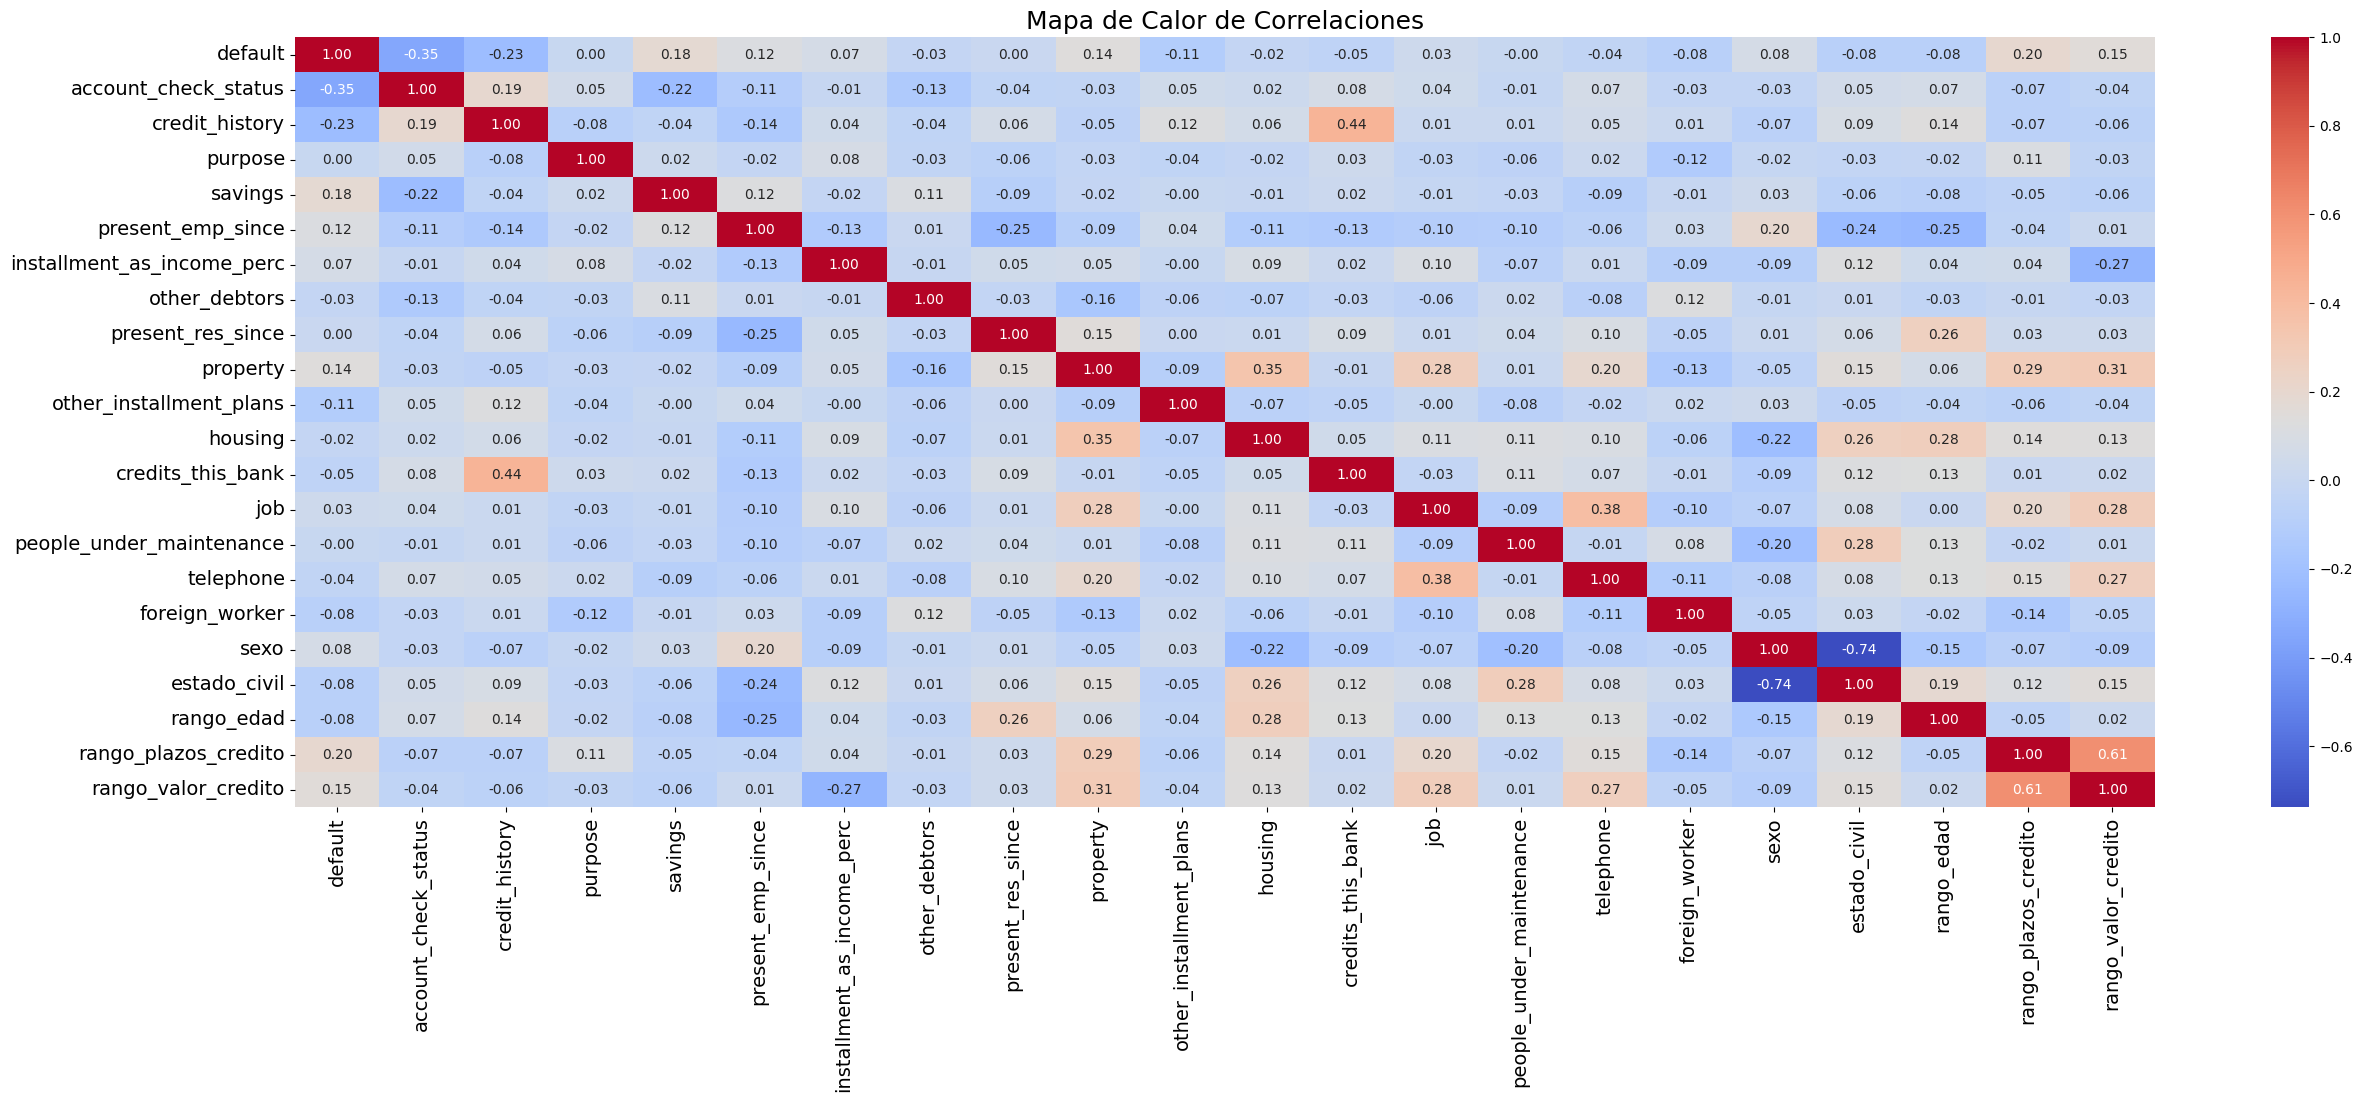

In [14]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [15]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

estado_civil  sexo
0             0       142
              1       310
1             0       548
dtype: int64


In [16]:
# Contabilizamos nuestra variable respuesta, "default" antes del balanceo
df_banco.default.value_counts()

0    700
1    300
Name: default, dtype: int64

In [17]:
# Vamos a eliminar las siguientes variables según el análisis realizo en cada una.

variables_descartadas = ["installment_as_income_perc","job","present_res_since","people_under_maintenance","credits_this_bank"]
df_banco = df_banco.drop(variables_descartadas,axis=1)

In [18]:
df_banco.shape

(1000, 17)

Como tenemos un desbalance en nuestra variable respuesta, se procedera con el balanceo de la clase 1 para que sea proporcional a la clase 0.

In [19]:
# Vamos a balancear la variable default, para poder obtener buenos resultados en nuestro modelo de machine learning
# es necesario hacer esto el balanceo, sino las predicciones tendrán tendecia hacer la clase que más datos tiene nu-
# estra variable resultado, que en este caso sería buen pagador el pronostico, por ende vamos a balancear usando el
# tecnica SMOTE con el fin de generar nuevos valores sintéticos seleccionando ejemplos cercanos en nuestra base de
# datos.
from imblearn.over_sampling import SMOTE
# Separamos nuestras varaibles las cuales serán X las de estudio, y Y las que queremos pronosticar, que es nuestra variable respuesta.
X = df_banco.drop("default", axis = 1)
y = df_banco["default"]
# Inicializamos la biblioteca, con la semilla random_state=234, al probar nuestro modelo usando está misma semilla, podra
# generar los mismos datos/resultados que generamos, al usar otra, o no colocar semilla, generara otras distintas, ya
# que este lo realiza de manera aleatoría.
smt = SMOTE(random_state=234)
# Aplicamos el método fit_resample() resample significa recrea o genera sinteticamente nuevos datos en X y Y de manera que quede proporcionalmente
# correcta. Ahora ya deberían de estar igualmente proporcionales.
# NOTA: Para poder realizar esto, primero tenemos que separar las variables como hicimos arriba.
X, y = smt.fit_resample(X, y)
# Ahora concatenamos, unimos todas nuestras variables en el mismo dataframe, para ahora tener nuestro dataframe listo para realizar nuestros
# modelos de machine learning
df_banco = pd.concat([X, y], axis=1)

0    700
1    700
Name: default, dtype: int64

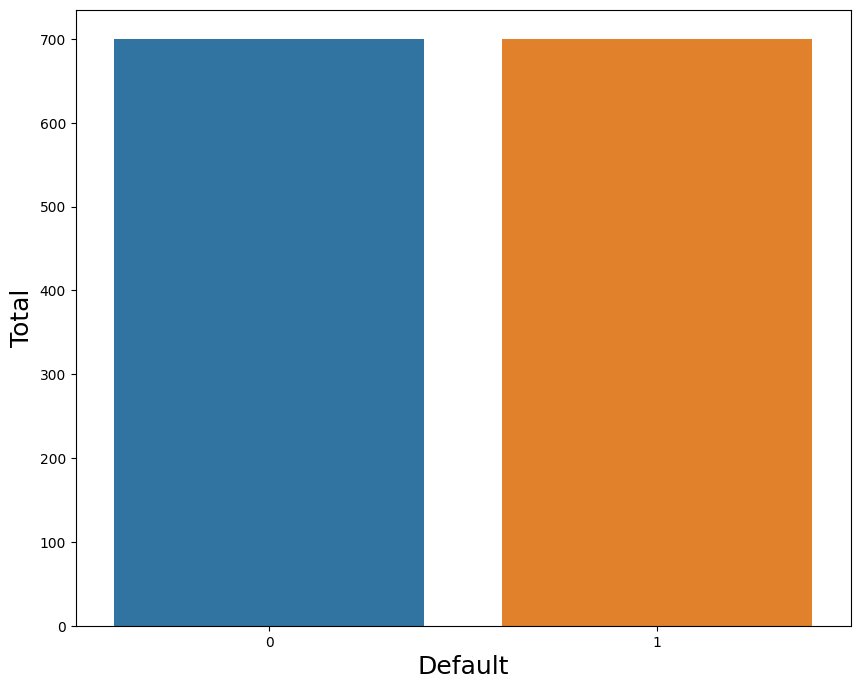

In [20]:
# Vamos a observar de manera gráfica como está balanceado nuestra variable respuesta y tambien la contabilizaremos
fig, axs = plt.subplots(figsize=(10, 8))
sns.countplot(x="default", data=df_banco, palette="tab10")
axs.set_xlabel("Default", fontsize=18)
axs.set_ylabel("Total", fontsize=18)
# Contabilizamos nuestra variable respuesta, "default" una vez balanceada las clases.
df_banco.default.value_counts()

In [21]:
df_banco

,account_check_status,credit_history,purpose,savings,present_emp_since,other_debtors,property,other_installment_plans,housing,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,default
0,1,5,5,1,1,1,1,3,2,2,1,0,1,5,1,2,0
1,2,3,5,5,3,1,1,3,2,1,1,1,0,1,4,6,1
2,4,5,8,5,2,1,1,3,2,1,1,0,1,3,1,3,0
3,1,3,4,5,2,3,2,3,3,1,1,0,1,3,4,8,0
4,1,4,1,5,3,1,4,3,3,1,1,0,1,4,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1,3,5,5,4,1,2,2,2,1,1,0,0,1,1,2,1
1396,4,4,1,5,1,1,2,2,2,1,1,0,1,2,2,3,1
1397,1,4,1,5,4,1,3,3,2,1,1,0,0,1,3,5,1
1398,3,3,4,5,4,1,3,3,2,2,1,1,0,1,3,10,1


#**4. Construcción de Modelos**


---


In [22]:
#Tu función crea_modelos() y tu código aqui
def crea_modelos():
  global resultados, test_y, predictions_RL, predictions_dtc, predictions_RF,predictions_NBG, model_RF
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  #x = df_banco[['estado_civil','sexo','rango_edad','rango_plazos_credito']]  #Solo usamos estas caractersiticas seleccionadas (evaluar si se elimina uno o no)

  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 101) #Probar con otros test_size y random state

  # MODELO 1: REGRESION LOGÍSTICA
  ## Creación del modelo RL
  model_RL = LogisticRegression()
  model_RL.fit(train_x, train_y)
  predictions_RL = model_RL.predict(test_x)

  ## Validaciones del modelo de RL
  accuracy_regresion_logistica = accuracy_score(test_y, predictions_RL)
  precision_regresion_logistica  = precision_score(test_y, predictions_RL)
  recall_regresion_logistica  = recall_score(test_y, predictions_RL)
  f1_regresion_logistica = f1_score(test_y,predictions_RL)
  auc_roc_regresion_logistica = roc_auc_score(test_y,predictions_RL)

  # MODELO 2: DECISION TREE
  model_dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
  model_dtc.fit(train_x, train_y)
  model_dtc.feature_importances_
  predictions_dtc = model_dtc.predict(test_x)

  ## Validaciones del modelo de dtc

  accuracy_arbol_decisiciones = accuracy_score(test_y, predictions_dtc)
  precision_arbol_decisiciones  = precision_score(test_y, predictions_dtc)
  recall_arbol_decisiciones  = recall_score(test_y, predictions_dtc)
  f1_arbol_decisiciones = f1_score(test_y,predictions_dtc)
  auc_roc_arbol_decisiciones = roc_auc_score(test_y,predictions_dtc)


  # MODELO 3: RANDOM FOREST
  ## Creación del modelo RF
  model_RF = RandomForestClassifier(n_estimators=77,random_state=101,max_depth=5,criterion='gini')  #n_estimators es el n° de arboles,probar con otro random_state, AUN INVESTIGANDO  QUE ES GINI si nos puede servir o no :))
  model_RF.fit(train_x, train_y)
  predictions_RF = model_RF.predict(test_x)

  ## Validaciones del modelo de RF
  accuracy_random_forest = accuracy_score(test_y, predictions_RF)
  precision_random_forest = precision_score(test_y, predictions_RF)
  recall_random_forest = recall_score(test_y, predictions_RF)
  f1_random_forest= f1_score(test_y,predictions_RF)
  auc_roc_random_forest = roc_auc_score(test_y,predictions_RF)

  # MODELO 4: NAIVE BAYES GAUSSIANO
  model_NBG = GaussianNB()
  model_NBG.fit(train_x, train_y)
  predictions_NBG = model_NBG.predict(test_x)
  ## Validaciones del modelo de RL
  accuracy_naive_bayes_g = accuracy_score(test_y, predictions_NBG)
  precision_naive_bayes_g  = precision_score(test_y, predictions_NBG)
  recall_naive_bayes_g  = recall_score(test_y, predictions_NBG)
  f1_naive_bayes_g = f1_score(test_y,predictions_NBG)
  auc_roc_naive_bayes_g = roc_auc_score(test_y,predictions_NBG)


  #Creamos una lista con los nombres de los modelos usados.
  nombre_modelo=['Regresión Logística','Árbol de decisiones','Random Forest','Naive Bayes Gaussiano']

  #LLenamos las listas con los resultados obtenidos de cada modelo en el paso anterior

  accuracy = []
  accuracy.extend([accuracy_regresion_logistica, accuracy_arbol_decisiciones,accuracy_random_forest,accuracy_naive_bayes_g])  #extend() para agregar varios elementos a una lista,tambn podemos llenar la lista directamente como en precision(ver abajo)

  precision = [precision_regresion_logistica, precision_arbol_decisiciones, precision_random_forest,precision_naive_bayes_g]

  recall = []
  recall.extend([recall_regresion_logistica, recall_arbol_decisiciones, recall_random_forest,recall_naive_bayes_g] )

  f1_scores= []
  f1_scores.extend([f1_regresion_logistica, f1_arbol_decisiciones, f1_random_forest,f1_naive_bayes_g])

  auc_roc = []
  auc_roc.extend([auc_roc_regresion_logistica, auc_roc_arbol_decisiciones, auc_roc_random_forest,auc_roc_naive_bayes_g])

  #Creamos nuestro diccionario de Resutados

  resultados = {
    'Model': nombre_modelo,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_scores,
    'AUC-ROC': auc_roc
  }

In [23]:
crea_modelos()
#Matríz de confusión
print(confusion_matrix(test_y, predictions_RL))
print(confusion_matrix(test_y, predictions_dtc))
print(confusion_matrix(test_y, predictions_RF))
print(confusion_matrix(test_y, predictions_NBG))

for i, model in enumerate(resultados['Model']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1-score'][i]}")
    print(f"AUC-ROC: {resultados['AUC-ROC'][i]}\n")

[[153  59]
 [ 48 160]]
[[166  46]
 [ 57 151]]
[[164  48]
 [ 40 168]]
[[123  89]
 [ 30 178]]
Modelo: Regresión Logística
Accuracy: 0.7452380952380953
Precisión: 0.730593607305936
Recall: 0.7692307692307693
F1-score: 0.7494145199063232
AUC-ROC: 0.7454644412191582

Modelo: Árbol de decisiones
Accuracy: 0.7547619047619047
Precisión: 0.766497461928934
Recall: 0.7259615384615384
F1-score: 0.745679012345679
AUC-ROC: 0.7544902031930332

Modelo: Random Forest
Accuracy: 0.7904761904761904
Precisión: 0.7777777777777778
Recall: 0.8076923076923077
F1-score: 0.7924528301886792
AUC-ROC: 0.7906386066763427

Modelo: Naive Bayes Gaussiano
Accuracy: 0.7166666666666667
Precisión: 0.6666666666666666
Recall: 0.8557692307692307
F1-score: 0.7494736842105263
AUC-ROC: 0.717978955007257



#**5. Evaluación y Selección del Modelo**


---


In [24]:
#Tu función visualiza_resultados() y tu código aqui
def visualiza_resultados():

  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos', bbox_to_anchor=(1, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

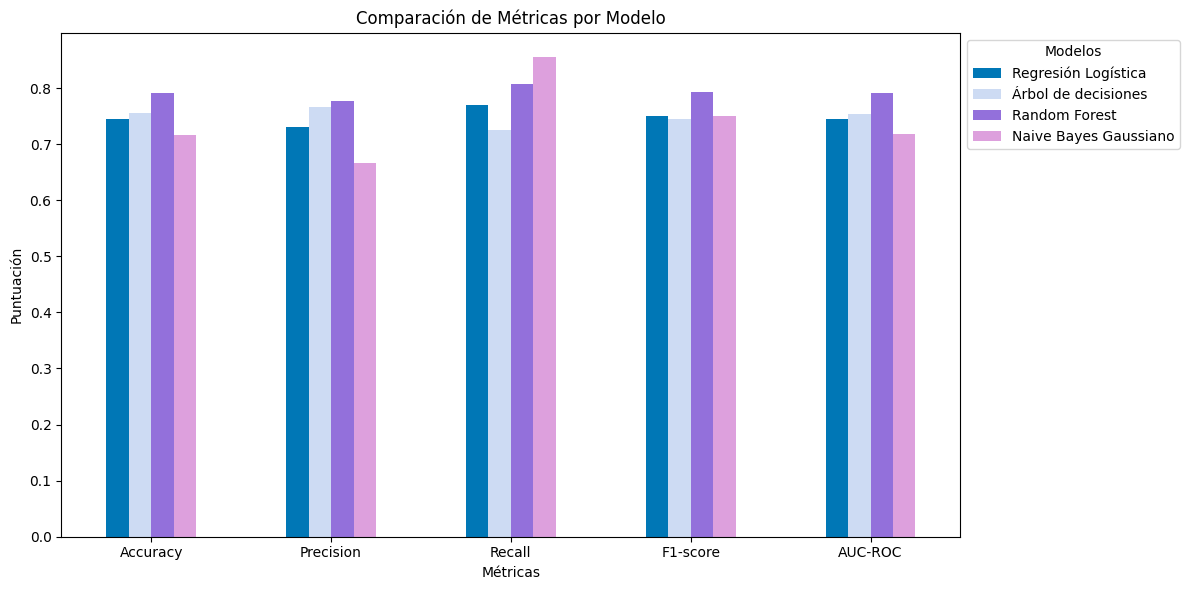

In [25]:
visualiza_resultados()

Según lo observado en las gráficas, el modelo que obtuvo valores más altos en 4 de las 5 métricas fue el de Random Forest. La única métrica en la que no obtuvo el mayor puntaje fue en la de recall, donde Naive Bayes Gaussiano tuvo un mejor comportamiento. Sin embargo, no nos interesa mucho guiarnos por esta métrica ya que solo evalúa los Verdaderos Positivos y los Falsos Negativos, es decir, estaría evaluando solamente si el cliente es un buen pagador. Pero nos interesa saber ambos, si será mal pagador o buen pagador. Por ende, nos guiaremos por la métrica de accuracy o exactitud, donde observamos que fue una de las 4 métricas donde **Random Forest** obtuvo el mayor puntaje dentro de las 5 métricas evaluadas. Esta métrica evalúa tanto los Verdaderos Positivos como los Verdaderos Negativos. Guiándonos por esta, obtenemos que nuestro mejor modelo es **Random Forest**.




In [26]:
# Leyendo la base de los nuevos clientes
datos_cliente = pd.read_csv("DatosNuevosClientes.csv", sep=";")
datos_cliente

,account_check_status,credit_history,purpose,savings,present_emp_since,other_debtors,property,other_installment_plans,housing,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,no checking account,existing credits paid back duly till now,radio/television,500 <= ... < 1000 DM,.. >= 7 years,none,if not A121 : building society savings agreeme...,none,own,none,yes,male,single,53,24,2835
1,< 0 DM,existing credits paid back duly till now,education,... < 100 DM,... < 1 year,none,unknown / no property,none,own,"yes, registered under the customers name",yes,male,divorced/separated,34,30,11998
2,< 0 DM,existing credits paid back duly till now,repairs,... < 100 DM,1 <= ... < 4 years,none,"if not A121/A122 : car or other, not in attrib...",none,own,none,yes,male,single,54,48,3051
3,< 0 DM,delay in paying off in the past,(vacation - does not exist?),... < 100 DM,... < 1 year,none,if not A121 : building society savings agreeme...,none,own,none,yes,female,single,26,21,3414
4,0 <= ... < 200 DM,existing credits paid back duly till now,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,none,"if not A121/A122 : car or other, not in attrib...",none,own,none,yes,female,single,32,36,2273


In [27]:
#Función para transformar o tratar los datos de los nuevos clientes
def nuevo_cliente_tratamiento_datos():
  global datos_cliente
  # Vamos a crear diccionarios para transformar las variables de catégoricas a númericas, usando los valores unicos de cada columna.
  dict_account = { "< 0 DM":1,
                  "0 <= ... < 200 DM":2,
                  ">= 200 DM / salary assignments for at least 1 year":3,
                  "no checking account":4
                  }

  dict_credit_history =  { "no credits taken/ all credits paid back duly":1,
                          "all credits at this bank paid back duly":2,
                          "existing credits paid back duly till now":3,
                          "delay in paying off in the past":4,
                          "critical account/ other credits existing (not at this bank)":5
                          }

  dict_purpose =  { "car (new)":	1,
                    "car (used)":2,
                    "furniture/equipment":3,
                    "radio/television":4,
                    "domestic appliances":5,
                    "repairs":6,
                    "education":7,
                    "(vacation - does not exist?)":8,
                    "retraining":9,
                    "business":10,
                    "others":11,
                          }

  dic_savings={ "unknown/ no savings account":1,
                ".. >= 1000 DM ":2,
                "500 <= ... < 1000 DM ":3,
                "100 <= ... < 500 DM":4,
                "... < 100 DM":5
                  }
  dic_present_emp = { ".. >= 7 years":1,
                      "4 <= ... < 7 years":2,
                      "1 <= ... < 4 years":3,
                      "... < 1 year ":4,
                      "unemployed":5
                    }

  dict_sex = { "male":0,
              "female":1,
                }

  dict_other_debtors = { "none":1,
                        "co-applicant":2,
                        "guarantor":3
                        }

  dict_property = {"real estate":1,
                  "if not A121 : building society savings agreement/ life insurance":2,
                  "if not A121/A122 : car or other, not in attribute 6":3,
                  "unknown / no property":4
                  }

  dict_other_installment_plans= {"bank":1,
                                "stores":2,
                                "none":3
                                }

  dict_housing = {"rent":1,
                  "own":2,
                  "for free":3
                  }

  dict_job = {"unemployed/ unskilled - non-resident":1,
              "unskilled - resident":2,
              "skilled employee / official":3,
              "management/ self-employed/ highly qualified employee/ officer":4
                }

  dict_telephone = {"none":1,
                    "yes, registered under the customers name":2
                    }

  dict_foreign_worker = {"yes":1,
                        "no":2
                        }

  dict_estado_civil = {"single":1,
                      "divorced/separated":0}
  # vamos a crear un diccionario con los diccionarios ya creados. Este
  # se encargara de almacenar cada uno de los diccionarios creados, con
  # el fin de luego pasarlo a través de un bucle for para cada columna y
  # sustituyendo el contido de c/u con el contenido de los diccionarios
  # según el nombre de columna almacenado en este diccionario.
  diccionario = {"account_check_status":dict_account,
                "credit_history":dict_credit_history,
                "purpose":dict_purpose,
                "savings":dic_savings,
                "present_emp_since":dic_present_emp,
                "other_debtors":dict_other_debtors,
                "sexo":dict_sex,
                "estado_civil":dict_estado_civil,
                "property":dict_property,
                "other_installment_plans":dict_other_installment_plans,
                "housing":dict_housing,
                "telephone":dict_telephone,
                "foreign_worker":dict_foreign_worker
                  }

  for columna in diccionario.keys():
      datos_cliente[columna] = datos_cliente[columna].map(diccionario[columna])

  intervalos_edad = [18,30,40,50,60,70,80]
  etiquetas_edad = [1,2,3,4,5,6]
  datos_cliente["rango_edad"] = pd.cut(x = datos_cliente["rango_edad"],bins=intervalos_edad,labels=etiquetas_edad)

  intervalos_duration = [1,12,24,36,48,60,72]
  etiquetas_duration = [1,2,3,4,5,6]
  datos_cliente["rango_plazos_credito"]= pd.cut(x = datos_cliente["rango_plazos_credito"],bins=intervalos_duration,labels=etiquetas_duration)

  # Ahora vamos a llevar los valores de credit_amount en intervalos, para clasificar esto de una mejor manera
  # Aunque podemos realizar esto usando el método sturges, ya el cliente nos da la indicación de como dividir los valores, los dividiremos en 20 intervalos distintos
  intervalos_credito = [1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]
  etiquetas_credito = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
  datos_cliente["rango_valor_credito"] = pd.cut(x = datos_cliente["rango_valor_credito"],bins=intervalos_credito,labels=etiquetas_credito)

  # Como el método pd.cut realiza el cambio y guardas estas etiquetas en formato texto, usaremos el método pd.to_numeric para convertir esas etiquetas, en númerico
  # para nuestro caso de estudio, ya que aunque están en formatos textos, son números y necesitaremos la información para realizar un mapa de calor.
  datos_cliente["rango_edad"] = pd.to_numeric(datos_cliente["rango_edad"])
  datos_cliente["rango_plazos_credito"] = pd.to_numeric(datos_cliente["rango_plazos_credito"])
  datos_cliente["rango_valor_credito"] = pd.to_numeric(datos_cliente["rango_valor_credito"])


In [28]:
nuevo_cliente_tratamiento_datos()

In [29]:
# Creando la función para predecir los nuevos clientes
def prediccion_cliente_nuevo():
  prediccion_nuevo_cliente = model_RF.predict(datos_cliente)
  diccionario = {'Si': 1, 'No': 0}
  for i, prediccion in enumerate(prediccion_nuevo_cliente):
      clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion), None)
      print(f"La probabilidad de que el cliente {i+1} nos pague es: {clave_encontrada}")

In [30]:
prediccion_cliente_nuevo()

La probabilidad de que el cliente 1 nos pague es: No
La probabilidad de que el cliente 2 nos pague es: Si
La probabilidad de que el cliente 3 nos pague es: Si
La probabilidad de que el cliente 4 nos pague es: Si
La probabilidad de que el cliente 5 nos pague es: Si
